# Psych 45: N-back stats

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=1.5)

## Import data file

In [19]:
data = pd.read_csv('http://web.stanford.edu/class/psych45/demos/Psych45-nback_stats.csv')

# filter RT column so just a number (ms and comma not included)
data.avg_rt = data.avg_rt.str.strip(' ms').str.replace(',', '').astype(float)

data.percent_correct = data.percent_correct.astype(float)
data.combined = data.combined.str.replace(',', '').astype(float)

task_list = ['2-back', '3-back', '4-back', '5-back', '6-back', '7-back', '8-back']
task_list_subset = ['2-back', '3-back', '4-back']

In [20]:
data.head()

,task,percent_correct,avg_rt,combined,when,date_downloaded
0,2-back,86.67,625.64,721.89,16 hours ago,"12:15 PM, Sunday"
1,2-back,93.33,629.59,674.56,16 hours ago,"12:15 PM, Sunday"
2,2-back,93.75,932.92,995.11,16 hours ago,"12:15 PM, Sunday"
3,2-back,60.00,1016.10,1693.50,16 hours ago,"12:15 PM, Sunday"
4,2-back,66.67,1092.92,1639.38,16 hours ago,"12:15 PM, Sunday"


## Analyses

#### Number of data points:

In [21]:
data.groupby(['task']).count().when

task
2-back    116
3-back     99
4-back     36
5-back      3
6-back      1
7-back      2
8-back      1
Name: when, dtype: int64

#### Mean accuracy and response time:

In [22]:
data.groupby(['task']).mean().reset_index()

,task,percent_correct,avg_rt,combined
0,2-back,74.876724,848.995086,1285.673793
1,3-back,54.447071,982.277576,2000.655859
2,4-back,47.973611,945.588611,2271.040000
3,5-back,49.680000,1019.380000,2161.653333
4,6-back,53.330000,748.230000,1402.940000
5,7-back,27.620000,1032.160000,3759.565000
6,8-back,26.670000,877.880000,3292.040000


### How does task affect percent of trials correct?

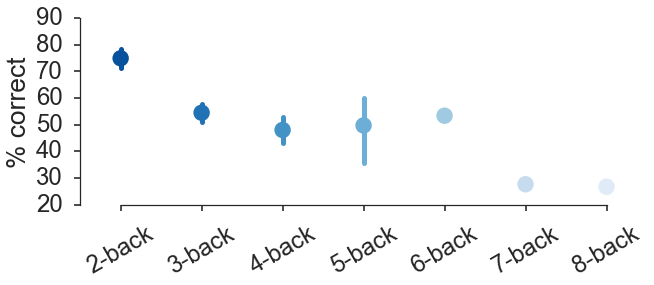

In [10]:
g = sns.factorplot(x='task', y='percent_correct', 
                   order=task_list,
                   data=data, 
                   ci=95, 
                   aspect=2.3,
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list)))
g.set_xlabels('')
g.set_ylabels('% correct')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

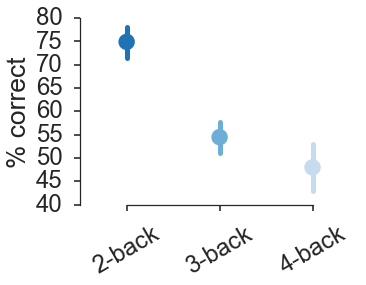

In [11]:
g = sns.factorplot(x='task', y='percent_correct', 
                   order=task_list_subset,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list_subset)), 
                   ci=95, 
                   aspect=1.3)
g.set_ylabels('% correct')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

### How does task affect average response time on correct trials?

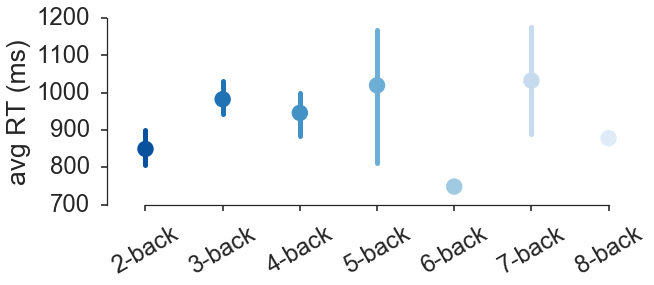

In [14]:
g = sns.factorplot(x='task', y='avg_rt', 
                   order=task_list,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list)), 
                   ci=95, 
                   aspect=2.3)
g.set_ylabels('avg RT (ms)')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

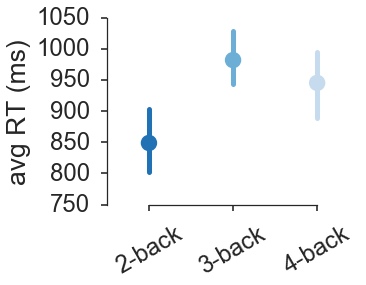

In [15]:
g = sns.factorplot(x='task', y='avg_rt', 
                   order=task_list_subset,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list_subset)), 
                   ci=95, 
                   aspect=1.3)
g.set_ylabels('avg RT (ms)')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)

### What about combined (correct and incorrect trials) RT?

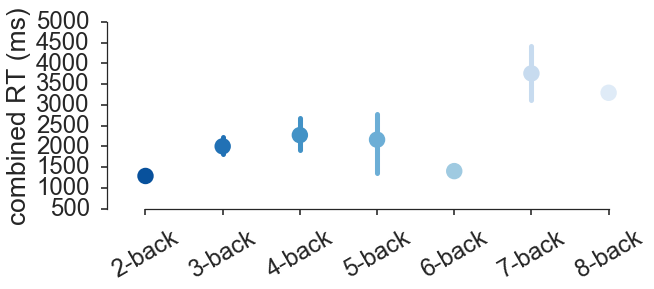

In [23]:
g = sns.factorplot(x='task', y='combined', 
                   order=task_list,
                   data=data, 
                   palette=sns.color_palette("Blues_r", 
                                             n_colors=len(task_list)), 
                   ci=95, 
                   aspect=2.3)
g.set_ylabels('combined RT (ms)')
g.set_xlabels('')
g.set_xticklabels(rotation=30)
sns.despine(trim=True)